# TODOs
* Stage data into memory instead of fit_generator
* Exercise for 1st part: investigate data, split data in a sensible way, set up a model, train it, evaluate it (simple RNN)
* Exercise for 2nd part: LSTMs, GRUs, dropout, recurrent dropout. Stacking? 
* For assignment: class weights to deal with class imbalance?

In [1]:
library(keras)
library(ggplot2)
library(tidyverse)
library(rsample)
library(tictoc)

library(repr)
options(repr.plot.width=6, repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.3.1     ✔ stringr 1.3.1
✔ tibble  2.0.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
df <- read.csv('../erasmus/', stringsAsFactors=FALSE)[,c('Date', 'Open')]
df$Date <- as.Date(df$Date, '%Y-%m-%d')
head(df)

In [ ]:
glimpse(df)

In [ ]:
ggplot(df, aes(df$Date, df$Open)) + geom_line() + xlab('Date') + ylab('Open stock price ($)') + ggtitle('AAPL opening stock price')

## Preprocessing
The label of data point `x` should be the opening stock price of data point `x+1`.

In [ ]:
?rolling_origin

In [ ]:
tmp <- data.frame(df$Open)
samples <- df$Open
n <- length(samples)
X_train <- array_reshape(head(samples, n - 1), c(n - 1, 1))
y_train <- tail(samples, n - 1)
cat(dim(X_train), dim(y_train))

In [ ]:
length(samples)

In [ ]:
apply.rolling(tmp, )

In [ ]:
rolling_origin_samples <- rolling_origin(
    tmp,
    initial=7,
    assess=1,
    cumulative=FALSE
)

In [ ]:
dim(rolling_origin_samples$splits[[5]]$data)

In [ ]:
glimpse(rolling_origin_samples$splits)

In [ ]:
x <- seq(1, 100, length=1000)
y <- sin(x)
plot(x, y, type='l')

In [ ]:
generator <- function(x, y, lookback, batch_size) {
    len <- length(x)
    function() {
        # Indices are for the targets
        indices <- sample(lookback + 1:len, batch_size)
        samples <- array(0, dim())
        
    }
}

In [ ]:
dim(x)

In [ ]:
length(y)

In [ ]:
len <- length(x)
lookback <- 7
batch_size <- 4

In [ ]:
indices <- sample(lookback + 1:len, batch_size)
indices

In [ ]:
samples <- array(0, dim=c())

## Build model

In [ ]:
model <- keras_model_sequential()
model %>%
    layer_lstm(
        units=128,
        input_shape=c(4, 7, 1),
        dropout=0.2,
        recurrent_dropout=0.2,
        return_sequences=TRUE
    ) %>% layer_dense(units=1)

model %>%
    compile(
        loss='logcosh',
        optimizer=optimizer_sgd(lr=0.1, momentum=0.9),
        metrics=list('mean_squared_error')
    )

## Train model

In [ ]:
history <- model %>% fit(
    x = X_train,
    y = y_train,
#     validation_data=list(X_val, y_val),
    batch_size=4,
    epochs=2
)

In [ ]:
plot(history)

## DEBUG: IMDB sample from book

In [ ]:
max_features <- 10000
maxlen <- 500
batch_size = 64

imdb <- dataset_imdb(num_words = max_features)
c(c(X_train, y_train), c(X_test, y_test)) %<-% imdb
cat(length(X_train))
length(y_train)

In [ ]:
length(X_train[[1]])

In [ ]:
X_train <- pad_sequences(X_train, maxlen = maxlen)
X_test  <- pad_sequences(X_test, maxlen = maxlen)

In [ ]:
dim(X_train)

In [ ]:
length(y_train)

In [ ]:
X_train[5000,]

In [ ]:
model <- keras_model_sequential() %>%
    layer_embedding(input_dim = max_features, output_dim = 32) %>%
    layer_simple_rnn(units = 32) %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_rmsprop(),
    loss = "binary_crossentropy",
    metrics = c("acc")
)

history <- model %>% fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

In [ ]:
plot(history)

## DEBUG: Jena weather data example from book

In [95]:
data <- read.csv('../jena_climate_2009_2016.csv')
glimpse(data)

Observations: 420,551
Variables: 15
$ Date.Time       <fct> 01.01.2009 00:10:00, 01.01.2009 00:20:00, 01.01.2009 …
$ p..mbar.        <dbl> 996.52, 996.57, 996.53, 996.51, 996.51, 996.50, 996.5…
$ T..degC.        <dbl> -8.02, -8.41, -8.51, -8.31, -8.27, -8.05, -7.62, -7.6…
$ Tpot..K.        <dbl> 265.40, 265.01, 264.91, 265.12, 265.15, 265.38, 265.8…
$ Tdew..degC.     <dbl> -8.90, -9.28, -9.31, -9.07, -9.04, -8.78, -8.30, -8.3…
$ rh....          <dbl> 93.3, 93.4, 93.9, 94.2, 94.1, 94.4, 94.8, 94.4, 93.8,…
$ VPmax..mbar.    <dbl> 3.33, 3.23, 3.21, 3.26, 3.27, 3.33, 3.44, 3.44, 3.36,…
$ VPact..mbar.    <dbl> 3.11, 3.02, 3.01, 3.07, 3.08, 3.14, 3.26, 3.25, 3.15,…
$ VPdef..mbar.    <dbl> 0.22, 0.21, 0.20, 0.19, 0.19, 0.19, 0.18, 0.19, 0.21,…
$ sh..g.kg.       <dbl> 1.94, 1.89, 1.88, 1.92, 1.92, 1.96, 2.04, 2.03, 1.97,…
$ H2OC..mmol.mol. <dbl> 3.12, 3.03, 3.02, 3.08, 3.09, 3.15, 3.27, 3.26, 3.16,…
$ rho..g.m..3.    <dbl> 1307.75, 1309.80, 1310.24, 1309.19, 1309.00, 1307.86,…
$ wv..m.s.      

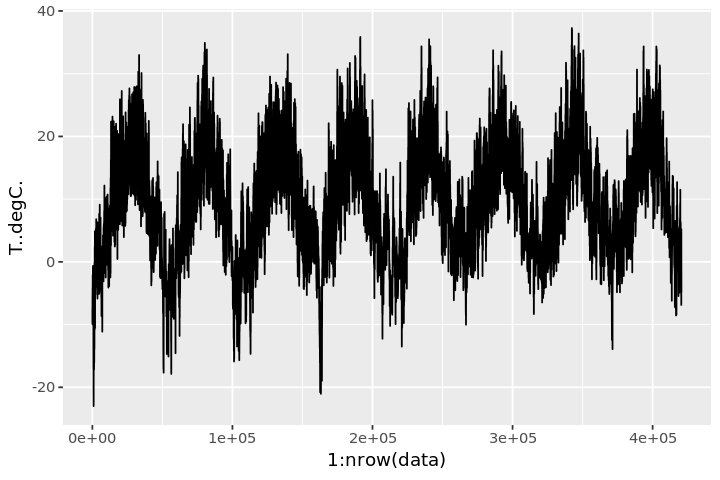

In [96]:
ggplot(data, aes(x = 1:nrow(data), y = `T..degC.`)) + geom_line()

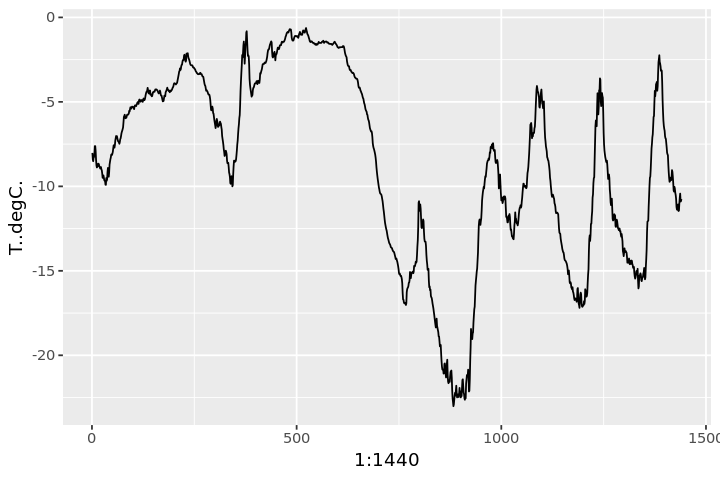

In [97]:
ggplot(data[1:1440,], aes(x = 1:1440, y = `T..degC.`)) + geom_line()

In [98]:
data <- data.matrix(data[,-1])
# data <- data[,1:4]
dim(data)

[1] 420551     14

In [99]:
X_train <- data[1:200000,]
data <- scale(data, center = apply(X_train, 2, mean), scale = apply(X_train, 2, sd))

In [100]:
X_train <- data[1:200000,]

In [101]:
X_train[1:10,]

p..mbar.,T..degC.,Tpot..K.,Tdew..degC.,rh....,VPmax..mbar.,VPact..mbar.,VPdef..mbar.,sh..g.kg.,H2OC..mmol.mol.,rho..g.m..3.,wv..m.s.,max..wv..m.s.,wd..deg.
0.9001452,-1.931354,-1.982105,-1.862796,1.072850,-1.307418,-1.473754,-0.7986844,-1.476264,-1.478152,2.123745,-0.7295027,-0.7806778,-0.2761353
0.9060411,-1.975409,-2.025665,-1.915825,1.078828,-1.320424,-1.495192,-0.8007504,-1.495021,-1.499318,2.171993,-0.9312378,-0.8879427,-0.4631733
0.9013244,-1.986705,-2.036834,-1.920011,1.108719,-1.323025,-1.497574,-0.8028163,-1.498772,-1.501669,2.182349,-1.2761399,-1.2612245,-0.0533062
0.8989660,-1.964113,-2.013379,-1.886519,1.126654,-1.316522,-1.483282,-0.8048823,-1.483767,-1.487559,2.157636,-1.1785261,-1.3170022,0.2514964
0.8989660,-1.959594,-2.010028,-1.882333,1.120676,-1.315222,-1.480900,-0.8048823,-1.483767,-1.485207,2.153165,-1.1915412,-1.2612245,0.4396888
0.8977869,-1.934742,-1.984339,-1.846050,1.138610,-1.307418,-1.466608,-0.8048823,-1.468761,-1.471096,2.126334,-1.2631247,-1.2612245,0.1903049
0.8977869,-1.886169,-1.936312,-1.779065,1.162523,-1.293113,-1.438024,-0.8069483,-1.438749,-1.442875,2.075027,-1.2826474,-1.2612245,-0.1121885
0.8977869,-1.886169,-1.936312,-1.787438,1.138610,-1.293113,-1.440406,-0.8048823,-1.442501,-1.445226,2.075262,-1.2761399,-1.3170022,-0.6652204
0.8977869,-1.918928,-1.968702,-1.839072,1.102741,-1.303517,-1.464226,-0.8007504,-1.465009,-1.468744,2.110095,-1.2175716,-1.2097373,0.1418136
0.9013244,-1.977668,-2.027899,-1.924198,1.060893,-1.320424,-1.499956,-0.7986844,-1.498772,-1.501669,2.173170,-1.0158364,-1.1539596,0.1014042


In [102]:
generator <- function(data, lookback, delay, min_index, max_index, shuffle = FALSE, batch_size = 512, step = 6) {
    if (is.null(max_index))
        max_index <- nrow(data) - delay - 1
    i <- min_index + lookback  # for looping through the data from start to end and back again
    
    function() {
        if (shuffle)
            rows <- sample(c((min_index + lookback):max_index), size = batch_size)
        else {
            # Loop around to start if necessary
            if (i + batch_size >= max_index)
                i <<- min_index + lookback
            
            # Select next batch_size rows
            rows <- c(i:min(i + batch_size, max_index))
            i <<- i + length(rows)
        }
        
        samples <- array(0, dim = c(length(rows), lookback / step, dim(data)[[-1]]))
        targets <- array(0, dim = c(length(rows)))
        
        for (j in 1:length(rows)) {
            indices <- seq(rows[[j]] - lookback, rows[[j]], length.out = dim(samples)[[2]])
            samples[j,,] <- data[indices,]
            targets[[j]] <- data[rows[[j]] + delay, 2]
        }
        list(samples, targets)
    }
}

In [ ]:
# lookback <- 7 * 6 * 24
lookback <- 1440
step <- 6
delay <- 144
batch_size <- 128
steps_per_epoch = 250
num_epochs = 25

training_generator <- generator(
    data,
    lookback = lookback,
    delay = delay,
    min_index = 1,
    max_index = 250000,
    shuffle = TRUE,
    step = step,
    batch_size = batch_size
)

validation_generator <- generator(
    data,
    lookback = lookback,
    delay = delay,
    min_index = 250001,
    max_index = 300000,
    step = step,
    batch_size = batch_size
)

validation_steps = (300000 - 250001 - lookback) / batch_size

In [2]:
Progress <- R6::R6Class("Progress",
  inherit = KerasCallback,
  
  public = list(
    num_batches = NULL,
    num_epochs  = NULL,
    update_frequency = NULL,
    epoch = NULL,
    batch = NULL,
      
    initialize = function(num_batches, num_epochs, update_frequency) {
        self$num_batches <- num_batches
        self$num_epochs <- num_epochs
        self$update_frequency <- update_frequency
        self$epoch <- 1
    },
                        
    on_batch_end = function(batch, logs = list()) {
        if ((batch + 1) %% self$update_frequency == 0) {
            cat('Epoch ', self$epoch + 1, '/', self$num_epochs, ': ', batch + 1, '/', self$num_batches, 
                ' - loss: ', logs[['loss']], ', acc.: ', logs[['acc']], '\r', sep = '')
            flush.console()
        }
        self$batch <- batch
    },
      
    on_epoch_begin = function(epoch, logs = list()) {
        self$epoch <- epoch
    },
                        
    on_epoch_end = function(epoch, logs = list()) {
        cat('Epoch ', self$epoch + 1, '/', self$num_epochs, ': ', self$batch + 1, '/', self$num_batches, 
                ' - loss: ', logs[['loss']], ', acc.: ',  logs[['acc']], ' - val. loss: ', logs[['val_loss']],
                ' - val. acc.: ', logs[['val_acc']], '\n', sep = '')
        flush.console()
    }
))

In [ ]:
model <- keras_model_sequential() %>%
#     layer_simple_rnn(units = 32, input_shape = list(NULL, dim(data)[[-1]])) %>%
#     layer_gru(units = 32, input_shape = list(NULL, dim(data)[[-1]])) %>%
    layer_gru(units = 32, input_shape = list(NULL, dim(data)[[-1]]), recurrent_dropout = 0.2, dropout = 0.2) %>%
#     layer_lstm(units = 32) %>%
    layer_dense(units = 1)
cat(summary(model))

progress <- Progress$new(steps_per_epoch, num_epochs, 10)

model %>% compile(
    optimizer = optimizer_rmsprop(),
    loss = "mae"
)

history <- model %>% fit_generator(
    training_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = list(progress)
)

In [ ]:
plot(history)

## Regularized stacked GRUs

In [ ]:
num_epochs <- 10

In [ ]:
model <- keras_model_sequential() %>%
    layer_gru(
        units = 32,
        input_shape = list(NULL, dim(data)[[-1]]),
        return_sequences = TRUE,
        dropout = 0.1,
        recurrent_dropout = 0.33
    ) %>%
    layer_gru(
        units = 32,
        dropout = 0.1,
        recurrent_dropout = 0.33
    ) %>%
    layer_dense(units = 1)
cat(summary(model))

progress <- Progress$new(steps_per_epoch, num_epochs, 10)

model %>% compile(
    optimizer = optimizer_rmsprop(),
    loss = "mae"
)

history <- model %>% fit_generator(
    training_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = list(progress)
)

In [ ]:
plot(history)

## DEBUG - stock prediction

In [78]:
df <- read.csv("data/AAPL.csv")
df <- df[nrow(df):1,-1]
mins <- apply(df, 2, min)
maxs <- apply(df, 2, max)
dim(df)
head(df)

[1] 1239    5

,close,volume,open,high,low
1239,558.46,13052,568.00,568.00,552.92
1238,559.99,41003,561.20,566.43,558.67
1237,556.97,10772,566.89,567.00,556.93
1236,567.16,7932,558.71,568.45,558.71
1235,567.00,146697,599.99,604.83,562.19
1234,569.74,5080231,569.85,587.28,564.13


In [79]:
df <- t(apply(df, 1, function(x) (x - mins) / (maxs - mins)))
head(df)

,close,volume,open,high,low
1239,0.08495965,0.0004593754,0.09448058,0.09258607,0.08583511
1238,0.08693186,0.0029671884,0.08572165,0.09056785,0.09338639
1237,0.08303901,0.0002548098,0.09305081,0.09130058,0.09110131
1236,0.09617417,0.0000000000,0.08251433,0.09316454,0.09343892
1235,0.09596793,0.0124502403,0.13568622,0.13993064,0.09800909
1234,0.09949986,0.4550956039,0.09686353,0.11737030,0.10055683


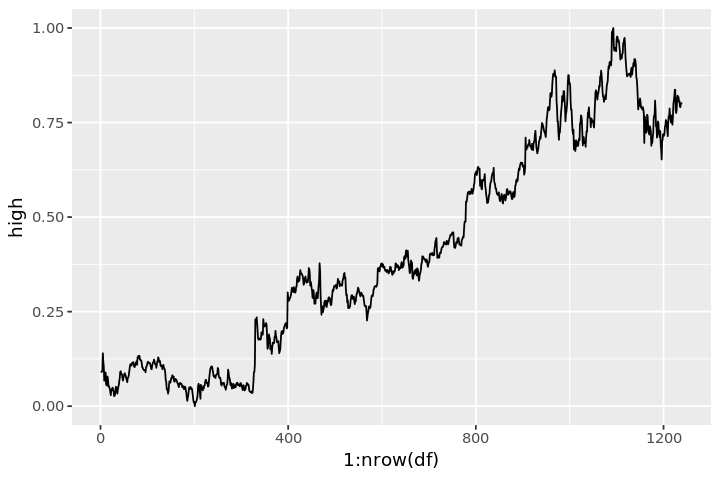

In [80]:
ggplot(data = as.data.frame(df), aes(x = 1:nrow(df), y = high)) + geom_line()

In [81]:
generator2 <- function(data, lookback, delay, min_index, max_index, shuffle = FALSE, batch_size = 512, step = 6) {
    if (is.null(max_index))
        max_index <- nrow(data) - delay - 1
    i <- min_index + lookback  # for looping through the data from start to end and back again
    
    function() {
        if (shuffle)
            rows <- sample(c((min_index + lookback):max_index), size = batch_size)
        else {
            # Loop around to start if necessary
            if (i + batch_size >= max_index)
                i <<- min_index + lookback
            
            # Select next batch_size rows
            rows <- c(i:min(i + batch_size, max_index))
            i <<- i + length(rows)
        }
        
        samples <- array(0, dim = c(length(rows), lookback / step, dim(data)[[-1]]))
        targets <- array(0, dim = c(length(rows)))
        
        for (j in 1:length(rows)) {
            indices <- seq(rows[[j]] - lookback, rows[[j]] - 1, length.out = dim(samples)[[2]])
            samples[j,,] <- data[indices,]
            targets[[j]] <- data[rows[[j]] + delay, 1]
        }
        list(samples, targets)
    }
}

lookback <- 14
step <- 1
delay <- 5
batch_size <- 64
steps_per_epoch <- 250
num_epochs <- 25

training_generator <- generator2(
    df,
    lookback = lookback,
    delay = delay,
    min_index = 1,
    max_index = 1100,
    shuffle = TRUE,
    step = step,
    batch_size = batch_size
)

validation_generator <- generator2(
    df,
    lookback = lookback,
    delay = delay,
    min_index = 1100,
    max_index = 1238,
    step = step,
    batch_size = batch_size
)

# validation_steps <- (1239 - 1100 - lookback) / batch_size
validation_steps <- 1

In [85]:
model <- keras_model_sequential() %>%
#     layer_simple_rnn(units = 32, input_shape = list(NULL, dim(data)[[-1]])) %>%
#     layer_gru(units = 32, input_shape = list(NULL, dim(data)[[-1]])) %>%
    layer_gru(units = 64, input_shape = list(NULL, dim(df)[[-1]]), recurrent_dropout = 0.2, dropout = 0.2, return_sequences = T) %>%
    layer_gru(units = 64, recurrent_dropout = 0.2, dropout = 0.2) %>%
#     layer_lstm(units = 32) %>%
    layer_dense(units = 1)
cat(summary(model))

progress <- Progress$new(steps_per_epoch, num_epochs, 10)

model %>% compile(
    optimizer = optimizer_adam(lr = 0.01),
    loss = "mae"
)

history <- model %>% fit_generator(
    training_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = list(progress)
)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
gru_13 (GRU)                        (None, None, 64)                13440       
________________________________________________________________________________
gru_14 (GRU)                        (None, 64)                      24768       
________________________________________________________________________________
dense_8 (Dense)                     (None, 1)                       65          
Total params: 38,273
Trainable params: 38,273
Non-trainable params: 0
________________________________________________________________________________
Epoch 1/25: 250/250 - loss: 0.0586181 - validation loss: 0.138209
Epoch 2/25: 250/250 - loss: 0.03937405 - validation loss: 0.1119624
Epoch 3/25: 250/250 - loss: 0.03708661 - validation loss: 0.09616219
Epoch 4/25: 250/250 - loss: 0.03594268 - validation loss: 0.05729083
Epoch 5/25

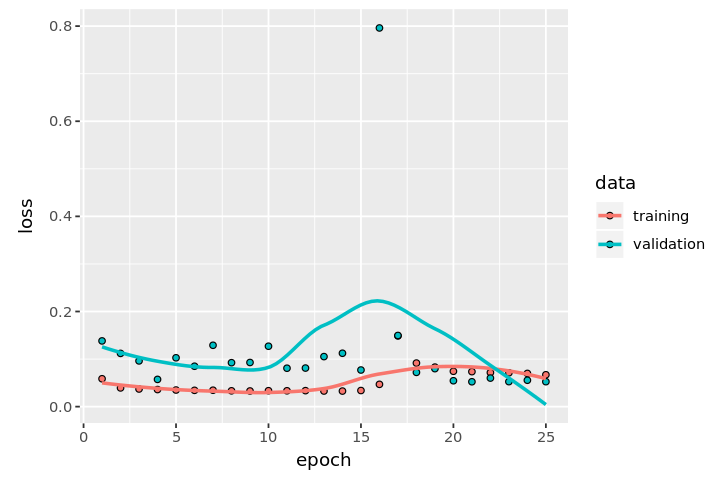

In [87]:
plot(history)

## DEBUG - human activity classification

In [186]:
df <- read.csv('data/smartphone.csv', stringsAsFactors = F)
head(df)

index,source,timestamp,values
1316828,step_detector,2017-06-29 07:45:16.506,['1.0']
1316829,battery,2017-06-29 07:45:16.514,['100']
1316830,activity,2017-06-29 07:45:16.579,['STILL: 100']
1316831,audio,2017-06-29 07:45:17.407,"['0.0', '0.0', '0.0', '32767.0']"
1316832,audio,2017-06-29 07:45:18.407,"['227.0', '113.5', '227.0', '227.0']"
1316833,activity,2017-06-29 07:45:18.767,['STILL: 100']


In [187]:
df <- df[df['source'] == 'linear_acceleration',]
head(df)

,index,source,timestamp,values
18,1316845,linear_acceleration,2017-06-29 07:45:22.007,"['0.12779976', '-0.06277906', '0.45205125']"
33,1316860,linear_acceleration,2017-06-29 07:45:27.030,"['-0.06043175', '0.029718934', '0.41986313']"
51,1316878,linear_acceleration,2017-06-29 07:45:32.054,"['0.84089065', '0.3555275', '0.52006143']"
66,1316894,linear_acceleration,2017-06-29 07:45:37.093,"['0.5095852', '0.37330416', '0.23654178']"
80,1316908,linear_acceleration,2017-06-29 07:45:42.118,"['0.46582192', '0.34427842', '0.0957648']"
94,1316922,linear_acceleration,2017-06-29 07:45:47.134,"['0.5302881', '0.35416028', '0.21512994']"


In [188]:
parseXYZ <- function(s) {
    xyz <- as.numeric(strsplit(gsub("[' ]", '', substr(s, 2, nchar(s) - 1)), ',')[[1]])
    names(xyz) <- c('x', 'y', 'z')
    xyz
}
xyz <- t(sapply(df$values, parseXYZ))
rownames(xyz) <- c()
head(xyz)

x,y,z
0.12779976,-0.06277906,0.4520513
-0.06043175,0.02971893,0.4198631
0.84089065,0.35552750,0.5200614
0.50958520,0.37330416,0.2365418
0.46582192,0.34427842,0.0957648
0.53028810,0.35416028,0.2151299


In [189]:
df <- as.data.frame(xyz)
dim(df)
head(df)

[1] 99750     3

x,y,z
0.12779976,-0.06277906,0.4520513
-0.06043175,0.02971893,0.4198631
0.84089065,0.35552750,0.5200614
0.50958520,0.37330416,0.2365418
0.46582192,0.34427842,0.0957648
0.53028810,0.35416028,0.2151299


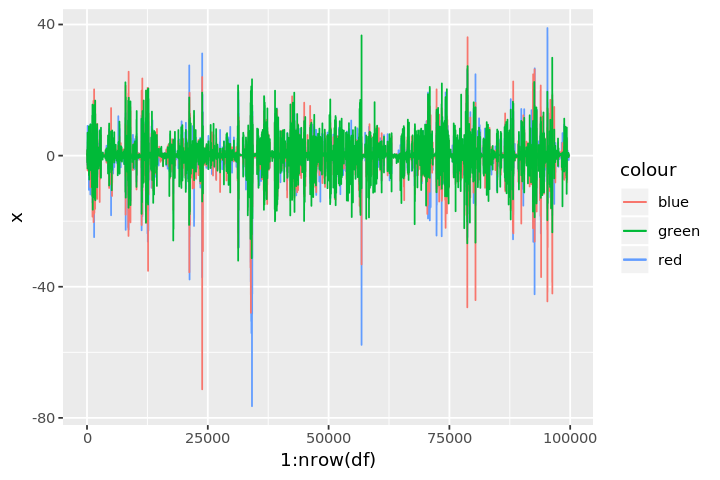

In [206]:
ggplot() +
    geom_line(data = df, aes(x = 1:nrow(df), y = x, colour = "red")) +
    geom_line(data = df, aes(x = 1:nrow(df), y = y, colour = "blue")) +
    geom_line(data = df, aes(x = 1:nrow(df), y = z, colour = "green"))

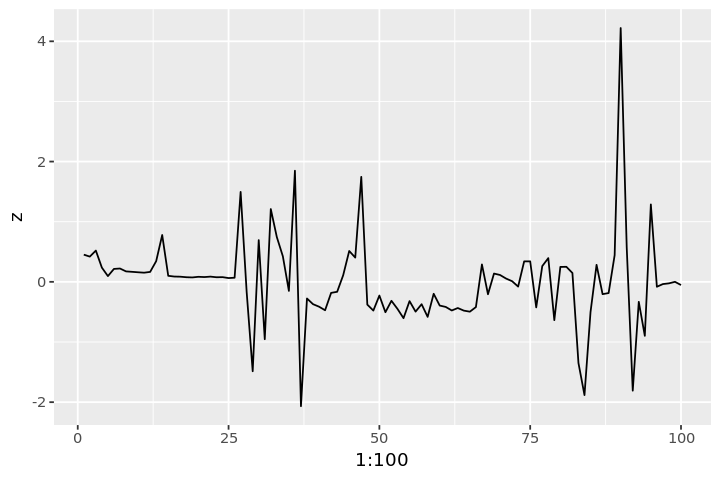

In [211]:
ggplot() + geom_line(data = df[1:100,], aes(x = 1:100, y = z))

# DEBUG: preprocessed data

In [87]:
data <- read.csv('data/smartphone-preprocessed.csv')
head(data)

timestamp,x,y,z,label
2017-06-29 07:45:21.520,-0.8126313,1.608939,2.14533385,STILL
2017-06-29 07:45:26.542,-0.5300865,1.745943,2.14800323,STILL
2017-06-29 07:45:31.548,-0.5180120,-1.225030,0.61977278,STILL
2017-06-29 07:45:36.552,-0.6798111,-1.132576,-0.07293608,STILL
2017-06-29 07:45:41.626,-0.6112276,-1.116289,-0.10363413,STILL
2017-06-29 07:45:46.648,-0.6493832,-1.127307,-0.08806267,STILL


In [88]:
table(data$label)


IN_VEHICLE ON_BICYCLE    ON_FOOT      STILL    TILTING    UNKNOWN 
      4679       1098       9788      72003          3      12296 

In [89]:
y <- as.numeric(data$label) - 1
table(y)

y
    0     1     2     3     4     5 
 4679  1098  9788 72003     3 12296 

In [90]:
df <- data
df$label <- y
df <- df[,-1]
df <- as.matrix(df)
head(df)

x,y,z,label
-0.8126313,1.608939,2.14533385,3
-0.5300865,1.745943,2.14800323,3
-0.5180120,-1.225030,0.61977278,3
-0.6798111,-1.132576,-0.07293608,3
-0.6112276,-1.116289,-0.10363413,3
-0.6493832,-1.127307,-0.08806267,3


In [91]:
nrow(df)

[1] 99867

In [92]:
generator3 <- function(data, lookback, delay, min_index, max_index, shuffle = FALSE, batch_size = 512, step = 6) {
    if (is.null(max_index))
        max_index <- nrow(data) - delay - 1
    i <- min_index + lookback  # for looping through the data from start to end and back again
    
    function() {
        if (shuffle)
            rows <- sample(c((min_index + lookback):max_index), size = batch_size)
        else {
            # Loop around to start if necessary
            if (i + batch_size >= max_index)
                i <<- min_index + lookback
            
            # Select next batch_size rows
            rows <- c(i:min(i + batch_size, max_index))
            i <<- i + length(rows)
        }
        
        samples <- array(0, dim = c(length(rows), lookback / step, dim(data)[[-1]] - 1))
        targets <- array(0, dim = c(length(rows)))
        
        for (j in 1:length(rows)) {
            indices <- seq(rows[[j]] - lookback, rows[[j]] - 1, length.out = dim(samples)[[2]])
            samples[j,,] <- data[indices,-4]
            targets[[j]] <- data[rows[[j]] + delay, 4]
        }
        
        targets <- to_categorical(targets, num_classes = length(table(data[, 4])))
        list(samples, targets)
    }
}

lookback <- 60
step <- 1
delay <- 0
batch_size <- 64
steps_per_epoch <- 250
num_epochs <- 25

training_generator <- generator3(
    df,
    lookback = lookback,
    delay = delay,
    min_index = 1,
    max_index = 70000,
    shuffle = TRUE,
    step = step,
    batch_size = batch_size
)

validation_generator <- generator3(
    df,
    lookback = lookback,
    delay = delay,
    min_index = 70001,
    max_index = 80000,
    step = step,
    batch_size = batch_size
)

validation_steps <- as.integer((80000 - 70001 - lookback) / batch_size)
validation_steps

[1] 155

In [94]:
model <- keras_model_sequential() %>%
    # Flavour 1: Simple RNN
#     layer_simple_rnn(units = 64, input_shape = list(NULL, dim(df)[[-1]] - 1), recurrent_dropout = 0.2, dropout = 0.2, return_sequences = T) %>%
#     layer_simple_rnn(units = 64, recurrent_dropout = 0.2, dropout = 0.2) %>%

    # Flavour 2: GRU: ~0.75
#     layer_gru(units = 64, input_shape = list(NULL, dim(df)[[-1]] - 1), recurrent_dropout = 0.2, dropout = 0.2, return_sequences = T) %>%
#     layer_gru(units = 64, recurrent_dropout = 0.2, dropout = 0.2) %>%

    layer_gru(units = 64, input_shape = list(NULL, 3), return_sequences = T) %>%
    layer_gru(units = 64) %>%

    # Flavour 3: GRU + CNN
#     layer_conv_1d(filters = 32, kernel_size = 3, activation = 'relu', input_shape = list(NULL, dim(df)[[-1]] - 1)) %>%
#     layer_max_pooling_1d(pool_size = 2) %>%
#     layer_conv_1d(filters = 64, kernel_size = 3, activation = 'relu') %>%
#     layer_max_pooling_1d(pool_size = 2) %>%
#     layer_gru(units = 64, recurrent_dropout = 0.2, dropout = 0.2, return_sequences = T) %>%
#     layer_gru(units = 64, recurrent_dropout = 0.2, dropout = 0.2) %>
    
    # Flavour 4: CNN
    
#     layer_conv_1d(filters = 32, kernel_size = 3, activation = 'relu', input_shape = list(60, 3)) %>%
#     layer_max_pooling_1d(pool_size = 2) %>%
#     layer_conv_1d(filters = 64, kernel_size = 3, activation = 'relu') %>%
#     layer_max_pooling_1d(pool_size = 2) %>%
#     layer_conv_1d(filters = 128, kernel_size = 3, activation = 'relu') %>%
#     layer_max_pooling_1d(pool_size = 2) %>%
#     layer_flatten() %>%
#     layer_dense(units = 256) %>%
#     layer_dense(units = length(table(y)), activation = 'softmax')

    # Flavour 5: DNN: ~ 60
    
#     layer_flatten(input_shape = list(60, 3)) %>%
#     layer_dense(units = 256) %>%
#     layer_dense(units = 512) %>%

    layer_dense(units = length(table(y)), activation = 'softmax')

cat(summary(model))

progress <- Progress$new(steps_per_epoch, num_epochs, 10)

model %>% compile(
    optimizer = optimizer_adam(),
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit_generator(
    training_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = list(progress)
)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
gru_38 (GRU)                        (None, None, 64)                13056       
________________________________________________________________________________
gru_39 (GRU)                        (None, 64)                      24768       
________________________________________________________________________________
dense_32 (Dense)                    (None, 6)                       390         
Total params: 38,214
Trainable params: 38,214
Non-trainable params: 0
________________________________________________________________________________
Epoch 1/25: 250/250 - loss: 0.6985698, acc.: 0.7674375 - val. loss: 0.7591218 - val. acc.: 0.6661042
Epoch 2/25: 250/250 - loss: 0.5167598, acc.: 0.8178125 - val. loss: 0.6949224 - val. acc.: 0.6946898
Epoch 3/25: 250/250 - loss: 0.4666107, acc.: 0.8264375 - val. loss: 0.759693 - v

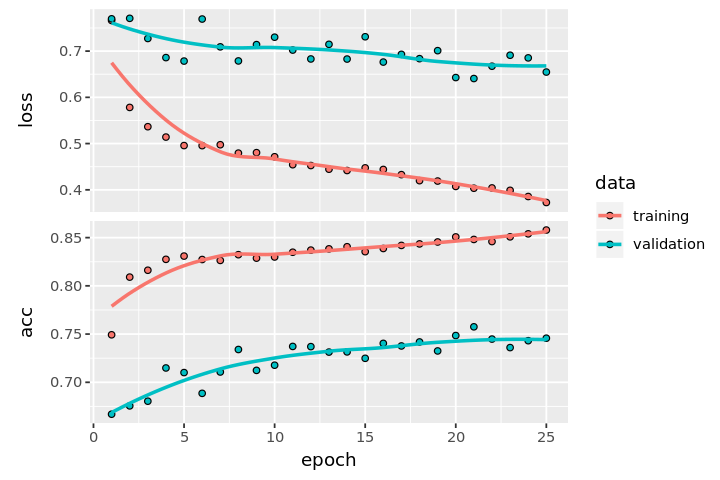

In [77]:
plot(history)

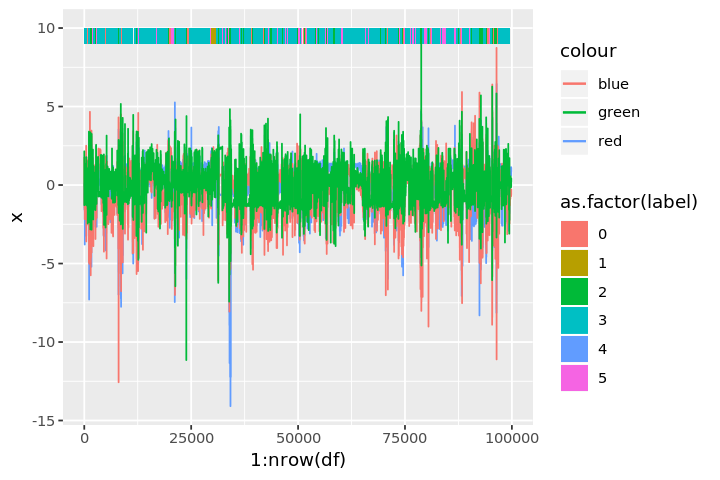

In [46]:
plot_timeseries <- function(df, boxes) {
    p <- ggplot() +
        geom_line(data = df, aes(x = 1:nrow(df), y = x, colour = "red")) +
        geom_line(data = df, aes(x = 1:nrow(df), y = y, colour = "blue")) +
        geom_line(data = df, aes(x = 1:nrow(df), y = z, colour = "green")) +
        geom_rect(data = boxes, mapping = aes(xmin = x1, xmax = x2, ymin = y1, ymax = y2, fill = as.factor(label)))
    p
}
plot_timeseries(as.data.frame(df), boxes)

In [38]:
last_index <- 1
last_label <- as.numeric(df[1,4])

boxes <- data.frame(x1=c(), x2=c(), y1=c(), y2=c(), stringsAsFactors = F)

for (i in 2:nrow(df)) {
    label <- as.numeric(df[i, 4])
    if (label != last_label) {
#         cat(last_index, ":", i, "->", last_label, "\n")
        boxes <- rbind(boxes, data.frame(
            x1=c(last_index),
            x2=c(i),
            y1=c(9),
            y2=c(10),
            label=c(last_label)
        ))
        last_label <- label
        last_index <- i
    }
}
head(boxes)

x1,x2,y1,y2,label
1,699,9,10,3
699,706,9,10,2
706,710,9,10,5
710,713,9,10,2
713,719,9,10,5
719,729,9,10,3


In [53]:
dim(training_generator()[[1]])

[1] 64 10  3

In [76]:
(table(y) / nrow(df)) * 100

y
           0            1            2            3            4            5 
 4.685231358  1.099462285  9.801035377 72.098891526  0.003003995 12.312375459 

In [83]:
(table(y[1:70000]) / nrow(df[1:70000,])) * 100


           0            1            2            3            4            5 
 3.900000000  1.504285714  9.205714286 75.575714286  0.002857143  9.811428571 

In [81]:
(table(y[70000:80000]) / nrow(df[70000:80000,])) * 100


        0         1         2         3         4         5 
 5.759424  0.409959 14.048595 59.044096  0.009999 20.727927 

In [82]:
(table(y[80000:99867]) / nrow(df[80000:99867,])) * 100


          0           1           2           3           5 
 6.91061003  0.02013288  9.75941212 66.42339440 16.88645057 